Start by importing the needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set()

Read in the data with pandas

In [2]:
data = pd.read_csv("data/drivingTimes.csv")
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time
data.head()

,date,day_of_the_week,time,time_of_day,olney_secs,college_park_secs,olney_mins,college_park_mins,olney_hours,college_park_hours
0,11/13/2019,Wednesday,06:00:00,Morning,2398,2405,39.966667,40.083333,0.666111,0.668056
1,11/13/2019,Wednesday,06:20:00,Morning,2555,2689,42.583333,44.816667,0.709722,0.746944
2,11/13/2019,Wednesday,06:40:00,Morning,2850,2774,47.500000,46.233333,0.791667,0.770556
3,11/13/2019,Wednesday,07:00:00,Morning,3217,3217,53.616667,53.616667,0.893611,0.893611
4,11/13/2019,Wednesday,07:20:00,Morning,3127,3167,52.116667,52.783333,0.868611,0.879722


## Commuting from Olney

Creating a dataset with just Olney time

In [3]:
data_olney = data.loc[:,["date", "day_of_the_week", 'time', 'time_of_day', 'olney_secs', 'olney_mins', 'olney_hours']]
data_olney.head()

,date,day_of_the_week,time,time_of_day,olney_secs,olney_mins,olney_hours
0,11/13/2019,Wednesday,06:00:00,Morning,2398,39.966667,0.666111
1,11/13/2019,Wednesday,06:20:00,Morning,2555,42.583333,0.709722
2,11/13/2019,Wednesday,06:40:00,Morning,2850,47.500000,0.791667
3,11/13/2019,Wednesday,07:00:00,Morning,3217,53.616667,0.893611
4,11/13/2019,Wednesday,07:20:00,Morning,3127,52.116667,0.868611


### Average Times

**What is the average time communting from Olney?**

In [4]:
data_olney.loc[:,["olney_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins
time_of_day,
Evening,65.427225
Morning,50.168532


**What is the average time in the morning if I leave at 7?**

In [5]:
data_olney.loc[data_olney['time'] == datetime.strptime("7:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    50.32
dtype: float64

**What is the average time in the evening if I leave at 4?**

In [6]:
data_olney.loc[data_olney['time'] == datetime.strptime("16:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    72.102857
dtype: float64

**What is the best time to go to work in the morning?**

In [7]:
avg_morning_time = data.loc[data_olney['time_of_day'] == "Morning"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_morning_time)
avg_morning_time.loc[avg_morning_time['olney_mins'].idxmin()]

,olney_mins
time,
06:00:00,40.562857
06:20:00,43.397143
06:40:00,45.902857
07:00:00,50.320000
07:20:00,54.118095
07:40:00,57.111429
08:00:00,57.419048
08:20:00,55.389048
08:40:00,51.991429


olney_mins    40.562857
Name: 06:00:00, dtype: float64

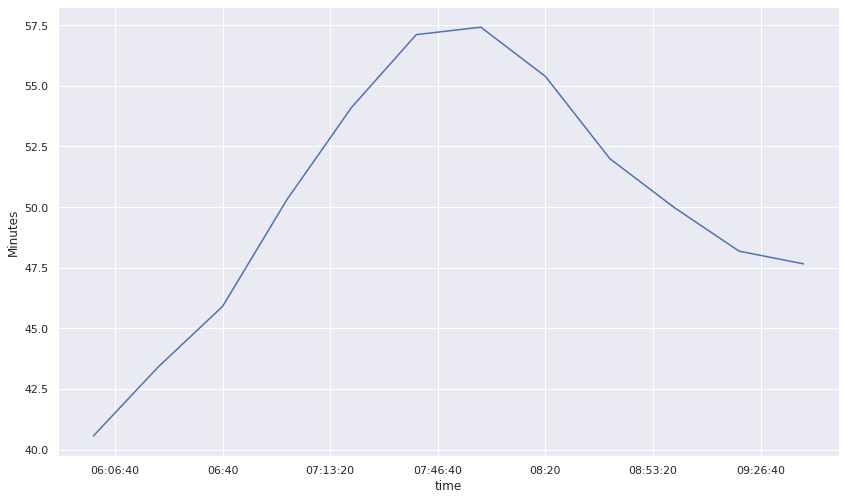

In [8]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_morning_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What is the best time to go home?**

In [9]:
avg_evening_time = data.loc[data_olney['time_of_day'] == "Evening"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_evening_time)
avg_evening_time.loc[avg_evening_time['olney_mins'].idxmin()]

,olney_mins
time,
15:00:00,64.411905
15:20:00,67.266190
15:40:00,70.447619
16:00:00,72.102857
16:20:00,73.322857
16:40:00,73.400476
17:00:00,73.724762
17:20:00,72.936190
17:40:00,71.012857


olney_mins    46.841935
Name: 19:40:00, dtype: float64

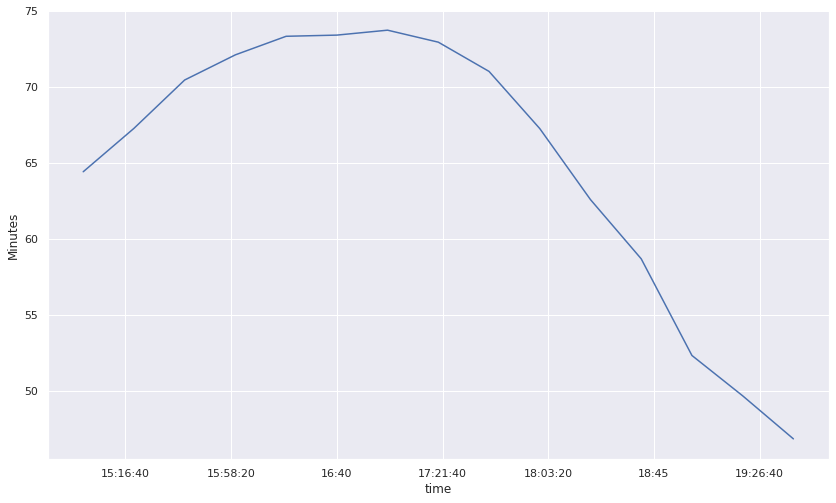

In [10]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_evening_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

### Comparing the days of the week

In [11]:
data_olney_dow = data_olney.loc[:,["olney_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean().reset_index()

**What are the averages for the morning?**

In [12]:
data_olney_dow_morning = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Morning"]
data_olney_dow_morning.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
5,Friday,45.098264
6,Monday,48.855729
7,Thursday,50.408179
8,Tuesday,52.332341
9,Wednesday,52.094246


**What is the quickest day of the week to get to work?**

In [13]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmin()]

time_of_day        Morning
day_of_the_week     Friday
olney_mins         45.0983
Name: 5, dtype: object

**What is the longest day of the week to go to work?**

In [14]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmax()]

time_of_day        Morning
day_of_the_week    Tuesday
olney_mins         52.3323
Name: 8, dtype: object

Morning time comparision

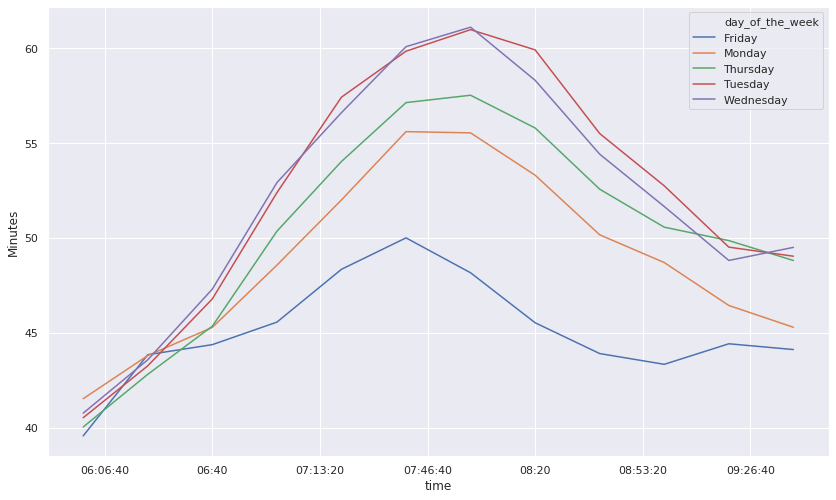

In [15]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Morning"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What are the averages for the evening?**

In [16]:
data_olney_dow_evening = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Evening"]
data_olney_dow_evening.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
0,Friday,61.428472
1,Monday,61.291667
2,Thursday,66.124568
3,Tuesday,68.743651
4,Wednesday,67.768571


**What is the quickest day of the week to get to home?**

In [17]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmin()]

time_of_day        Evening
day_of_the_week     Monday
olney_mins         61.2917
Name: 1, dtype: object

**What is the longest day of the week to go to home?**

In [18]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmax()]

time_of_day        Evening
day_of_the_week    Tuesday
olney_mins         68.7437
Name: 3, dtype: object

Evening time comparision

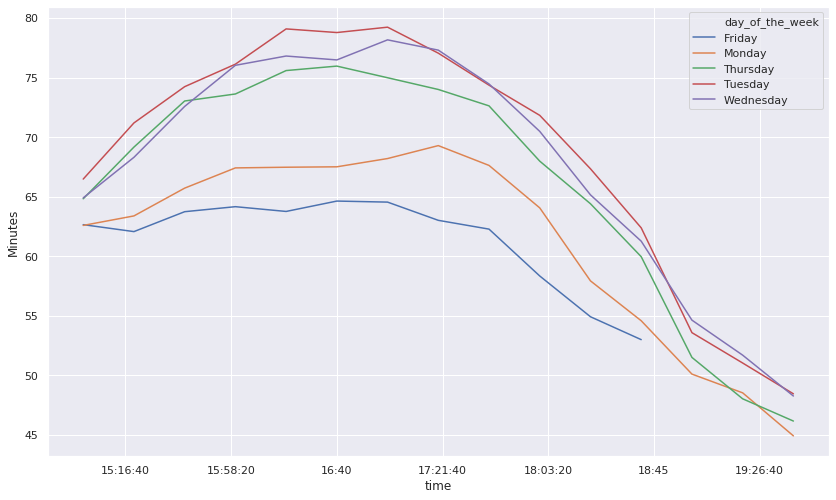

In [19]:
data_olney_evening = data_olney.loc[data_olney['time_of_day'] == "Evening"]
plot_data = data_olney_evening.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

## Commuting from College Park

Creating a dataset with just College Parktime

In [20]:
data_cp = data.loc[:,["date", "day_of_the_week", 'time', 'time_of_day', 'college_park_secs', 'college_park_mins', 'college_park_hours']]
data_cp.head()

,date,day_of_the_week,time,time_of_day,college_park_secs,college_park_mins,college_park_hours
0,11/13/2019,Wednesday,06:00:00,Morning,2405,40.083333,0.668056
1,11/13/2019,Wednesday,06:20:00,Morning,2689,44.816667,0.746944
2,11/13/2019,Wednesday,06:40:00,Morning,2774,46.233333,0.770556
3,11/13/2019,Wednesday,07:00:00,Morning,3217,53.616667,0.893611
4,11/13/2019,Wednesday,07:20:00,Morning,3167,52.783333,0.879722


### Average Times

**What is the average time communting from College Park?**

In [21]:
data_cp.loc[:,["college_park_mins", 'time_of_day']].groupby('time_of_day').mean()

,college_park_mins
time_of_day,
Evening,62.270793
Morning,45.465357


**What is the average time in the morning if I leave at 7?**

In [22]:
data_cp.loc[data_cp['time'] == datetime.strptime("7:00:00","%H:%M:%S").time()].loc[:,["college_park_mins"]].mean()

college_park_mins    46.668571
dtype: float64

**What is the average time in the evening if I leave at 4?**

In [23]:
data_cp.loc[data_cp['time'] == datetime.strptime("16:00:00","%H:%M:%S").time()].loc[:,["college_park_mins"]].mean()

college_park_mins    71.076667
dtype: float64

**What is the best time to go to work in the morning?**

In [24]:
avg_morning_time = data.loc[data_cp['time_of_day'] == "Morning"].loc[:,["college_park_mins", 'time']].groupby('time').mean()
display(avg_morning_time)
avg_morning_time.loc[avg_morning_time['college_park_mins'].idxmin()]

,college_park_mins
time,
06:00:00,38.210000
06:20:00,42.222857
06:40:00,43.523810
07:00:00,46.668571
07:20:00,49.730476
07:40:00,50.113810
08:00:00,50.491905
08:20:00,49.691905
08:40:00,47.936190


college_park_mins    38.21
Name: 06:00:00, dtype: float64

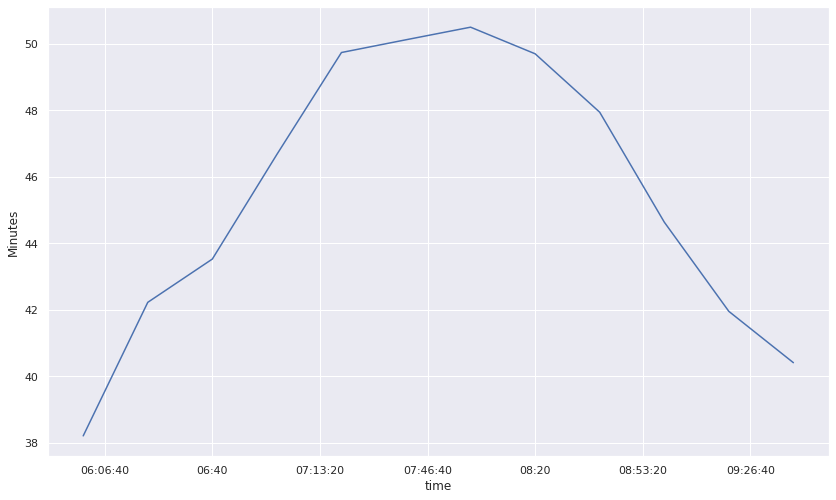

In [25]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='college_park_mins', data=avg_morning_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What is the best time to go home?**

In [26]:
avg_evening_time = data.loc[data_cp['time_of_day'] == "Evening"].loc[:,["college_park_mins", 'time']].groupby('time').mean()
display(avg_evening_time)
avg_evening_time.loc[avg_evening_time['college_park_mins'].idxmin()]

,college_park_mins
time,
15:00:00,63.280952
15:20:00,67.577619
15:40:00,69.122857
16:00:00,71.076667
16:20:00,71.874286
16:40:00,70.996667
17:00:00,71.382857
17:20:00,71.117143
17:40:00,69.321429


college_park_mins    37.894624
Name: 19:40:00, dtype: float64

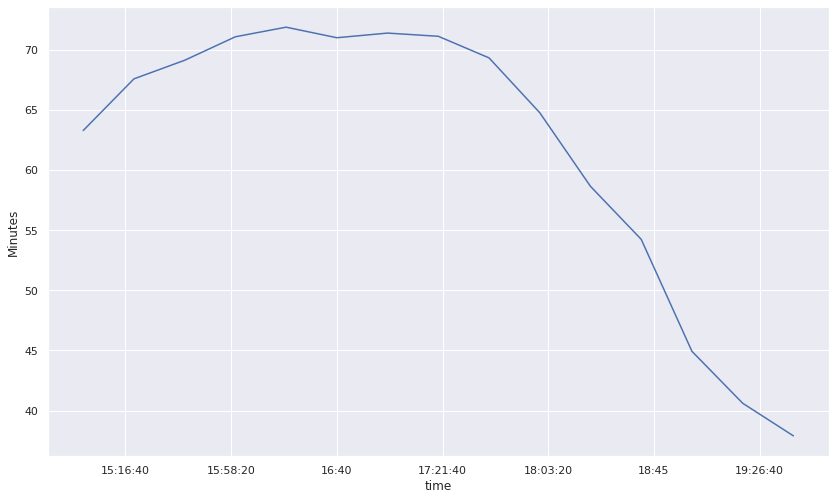

In [27]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='college_park_mins', data=avg_evening_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

### Comparing the days of the week

In [28]:
data_cp_dow = data_cp.loc[:,["college_park_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean().reset_index()

**What are the averages for the morning?**

In [29]:
data_cp_dow_morning = data_cp_dow.loc[data_olney_dow['time_of_day'] == "Morning"]
data_cp_dow_morning.loc[:,["day_of_the_week", "college_park_mins"]]

,day_of_the_week,college_park_mins
5,Friday,39.029514
6,Monday,44.131944
7,Thursday,45.190741
8,Tuesday,47.904960
9,Wednesday,48.580357


**What is the quickest day of the week to get to work?**

In [30]:
data_cp_dow_morning.loc[data_cp_dow_morning['college_park_mins'].idxmin()]

time_of_day          Morning
day_of_the_week       Friday
college_park_mins    39.0295
Name: 5, dtype: object

**What is the longest day of the week to go to work?**

In [31]:
data_cp_dow_morning.loc[data_cp_dow_morning['college_park_mins'].idxmax()]

time_of_day            Morning
day_of_the_week      Wednesday
college_park_mins      48.5804
Name: 9, dtype: object

Morning time comparision

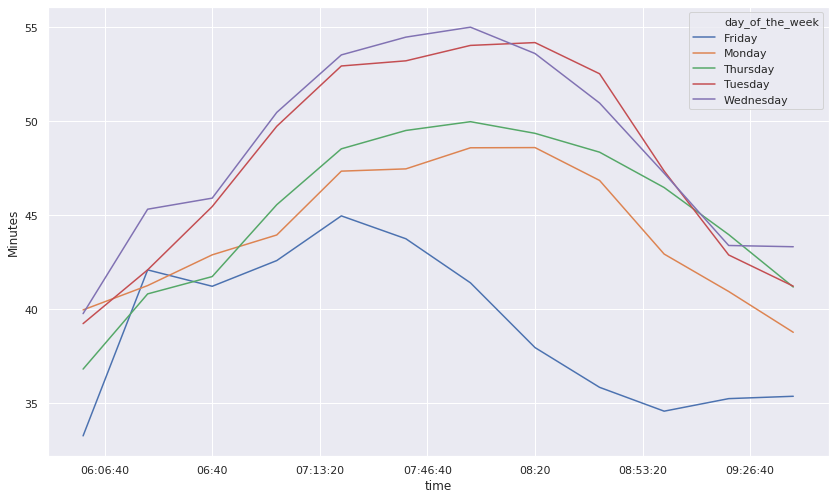

In [32]:
data_cp_morning = data_cp.loc[data_cp['time_of_day'] == "Morning"]
plot_data = data_cp_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='college_park_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What are the averages for the evening?**

In [33]:
data_cp_dow_evening = data_cp_dow.loc[data_cp_dow['time_of_day'] == "Evening"]
data_cp_dow_evening.loc[:,["day_of_the_week", "college_park_mins"]]

,day_of_the_week,college_park_mins
0,Friday,59.514236
1,Monday,58.105694
2,Thursday,62.323951
3,Tuesday,65.689841
4,Wednesday,64.803651


**What is the quickest day of the week to get to home?**

In [34]:
data_cp_dow_evening.loc[data_cp_dow_evening['college_park_mins'].idxmin()]

time_of_day          Evening
day_of_the_week       Monday
college_park_mins    58.1057
Name: 1, dtype: object

**What is the longest day of the week to go to home?**

In [35]:
data_cp_dow_evening.loc[data_cp_dow_evening['college_park_mins'].idxmax()]

time_of_day          Evening
day_of_the_week      Tuesday
college_park_mins    65.6898
Name: 3, dtype: object

Evening time comparision

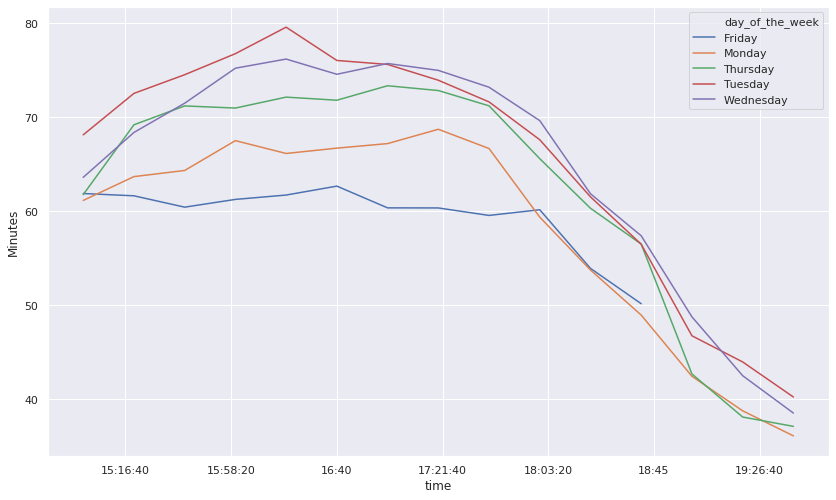

In [36]:
data_cp_evening = data_cp.loc[data_cp['time_of_day'] == "Evening"]
plot_data = data_cp_evening.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='college_park_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

## Comparing the two

First, we will look at some overall averages

In [37]:
data.loc[:,["olney_mins", "college_park_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins,college_park_mins
time_of_day,,
Evening,65.427225,62.270793
Morning,50.168532,45.465357


The averages by the day of the week

In [38]:
day_week_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean()
display(day_week_mean) 
day_week_mean = day_week_mean.reset_index()

olney_mins  college_park_mins
time_of_day day_of_the_week                               
Evening     Friday            61.428472          59.514236
            Monday            61.291667          58.105694
            Thursday          66.124568          62.323951
            Tuesday           68.743651          65.689841
            Wednesday         67.768571          64.803651
Morning     Friday            45.098264          39.029514
            Monday            48.855729          44.131944
            Thursday          50.408179          45.190741
            Tuesday           52.332341          47.904960
            Wednesday         52.094246          48.580357

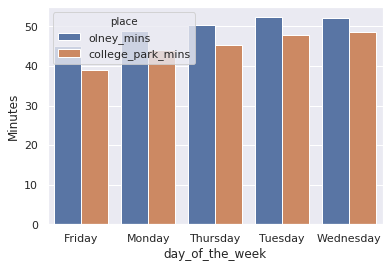

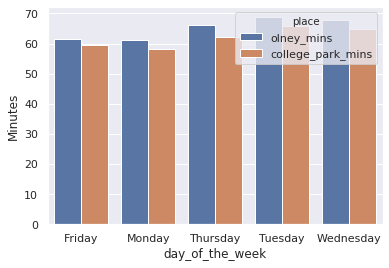

In [39]:
day_week_mean_morning = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_morning, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_week_mean_evening = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_evening, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

The averages by time

In [40]:
day_time_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'time']].groupby(['time_of_day', 'time']).mean()
display(day_time_mean) 
day_time_mean = day_time_mean.reset_index()

olney_mins  college_park_mins
time_of_day time                                   
Evening     15:00:00   64.411905          63.280952
            15:20:00   67.266190          67.577619
            15:40:00   70.447619          69.122857
            16:00:00   72.102857          71.076667
            16:20:00   73.322857          71.874286
            16:40:00   73.400476          70.996667
            17:00:00   73.724762          71.382857
            17:20:00   72.936190          71.117143
            17:40:00   71.012857          69.321429
            18:00:00   67.253333          64.762857
            18:20:00   62.580000          58.640000
            18:40:00   58.685238          54.235714
            19:00:00   52.326882          44.925806
            19:20:00   49.673656          40.608602
            19:40:00   46.841935          37.894624
Morning     06:00:00   40.562857          38.210000
            06:20:00   43.397143          42.222857
            06:40:00   45.902857          43.523810
            07:00:00   50.320000          46.668571
            07:20:00   54.118095          49.730476
            07:40:00   57.111429          50.113810
            08:00:00   57.419048          50.491905
            08:20:00   55.389048          49.691905
            08:40:00   51.991429          47.936190
            09:00:00   49.972857          44.633810
            09:20:00   48.181429          41.951905
            09:40:00   47.656190          40.409048

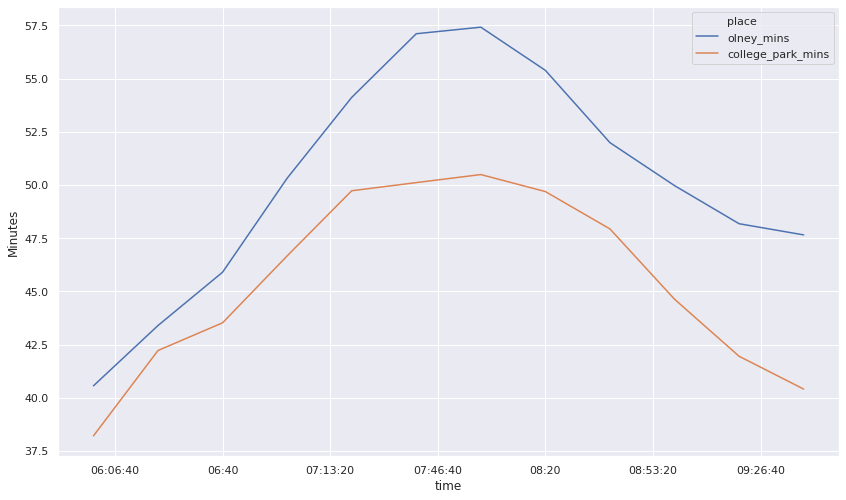

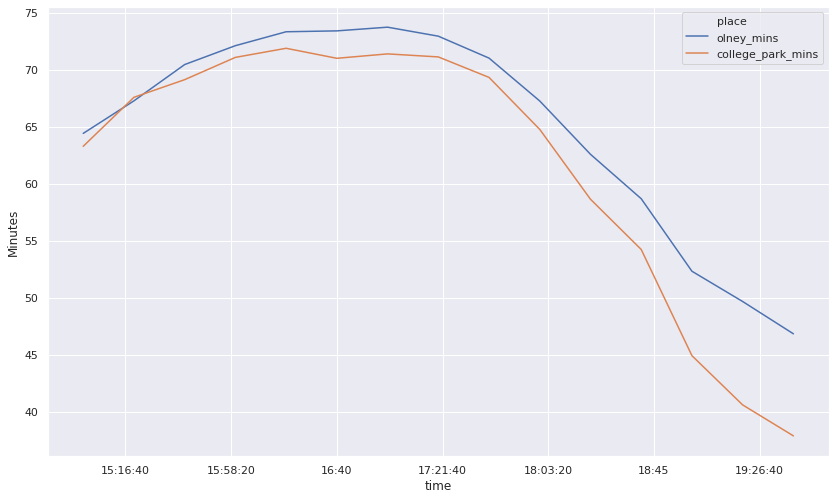

In [41]:
day_time_mean_morning = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")

fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_morning, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_time_mean_evening = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_evening, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()